# PHYS 270 Assignment 2: Numerical Errors
Student Name: Rakhat Zhussupkhanov

**Abstract**

In this assignment, it was determined how many terms of a series are needed to reach a relative error value of $10^{-6}$.

**Introduction**

Errors occur everywhere, especially in numerical computations. Because they are a mere approximation, it is essential, especially for computers, to have an error as small as possible. Since every calculation may have errors, they have to be examined closely. There are two types of numerical errors: truncation errors and round-off errors. Truncation error is the error that ignores infinitely many terms of a series and considers a finite amount. Rounded-off error is the difference between the exact and rounded-off approximate values.

**Method**

In the first part of the assignment, it was needed to determine $f(0)$. To do that, I used a loop which executes until the a term becomes $10^{-15}$, which is the minimum possible value in Python. In the loop, every term is added to the sum.

In the second part, I used almost the same idea as in the first part not without the help of some libraries. `mpmath` library was used to determine the true value of a series, because it is a very convenient way of doing so with only two lines of code. `matplotlib` was used to plot graphs. The error was calculated in a loop which kept running until the error equaled $10^{-6}$. The formula is $$\frac{true\;value - approximate\;value}{true\;value}$$ An approximate value was calculated in the same way as in the first part. In the end, every 10000th value of the error and every term was appended to two separate lists to plot a graph of the relative error as a function of $k$ with the help of `matplotlib`.

The third part required to prove that $f(1) = 1$. For that I approached the problem mathematically. As for proving that $f(x) - f(0)$ converges faster, I changed the function of the second part slightly.

###**PART 1**

First, we import the necessary libraries.

In [ ]:
from mpmath import *
import matplotlib.pyplot as plt
from math import pi

To find the value of $f(0)$, I decided to write a code.

In [ ]:
sum = 0 #initating variables
term = 1
i = 1
while term > 1e-15: #loop for computing the sum of the series
  term = 1.0/i**2
  sum += term
  i += 1
print(sum)
print(pi**2 / 6)

1.644934035288937
1.6449340668482264


$f(0)$ gives us $$\sum\limits_{k=1}^{\infty}\frac{1}{k^2}$$, which is equal to $1.644934...$, or $\frac{\pi^2}{6}$, as proven by Leonard Euler in the 18th century.

###**PART 2**

Here, we need to find how many terms are necessary to reach the error of $10^{-6}$ for three values of $x$: $0$, $0.9$, and $20$. To not write the same code three times, we can just implement a function and put these values instead of the argument of that.

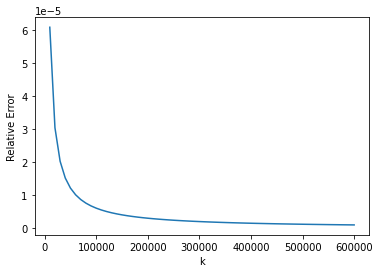

(607927, 1.644932421915273, 0.000000999999323125603392729111357236)


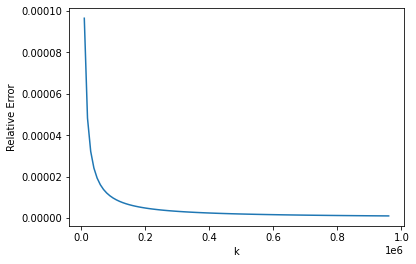

(964217, 1.0371098807407306, 0.000000999999045362747425478292137288)


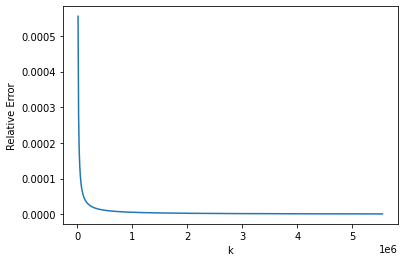

(5559036, 0.179886802970232, 0.000000999999829048191833036500071502)


In [ ]:
def series(x): #this function calculates a true value, an approximate value,
#and a relative error and plots a graph of the error as a function of k
  err = [] #the lists for the graph's axes
  terms = []
  mp.dps = 30; mp.pretty = True #calculating the true value
  true_value = nsum(lambda n: 1/(n**2+x*n), [1, inf])
  i = 1 #initiating variables
  sum = 0
  error = 1
  while error >= 1e-6: #the loop will execute until the error equals 10^-6
    term = 1.0/(i * (i + x))
    sum += term
    error = (true_value - sum) / true_value
    if i % 10000 == 0: #we take every 10000th value because there are a lot of them,
    #which is why the graph could be ugly
      err.append(error)
      terms.append(i)
    if error >= 1e-6:
      i += 1
    else: break 
  plt.plot(terms, err) #plotting the graph
  plt.ylabel('Relative Error')
  plt.xlabel('k')
  plt.show()
  return i, sum, error

print(series(0))
print(series(0.9))
print(series(20))

This is a truncation error because we consider an infinite series and find the relative error term by term, which corresponds to the definition of truncation errors given above.

###**PART 3**

$$\sum\limits_{k=1}^{\infty}\frac{1}{k} - \frac{1}{k+1}$$ gives us $1 - \frac{1}{2} + \frac{1}{2} - \frac{1}{3} + \frac{1}{3} + ... + \frac{1}{k} - \frac{1}{k+1} $ where every term except $1$ cancels out, which gives the result of $1$.

To show that less terms are needed for $f(x) - f(1)$ to converge, I used almost the same function as in the second part but with some changes. Namely, I subtracted $f(1)$ from $f(x)$ in the function.

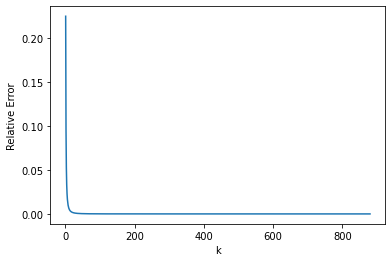

(880, 0.6449334224082466, 0.000000999233895340970519806439318926)


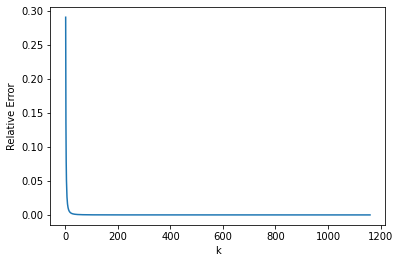

(1160, 0.03711088076501751, 0.000000999318881201395848603176168948)


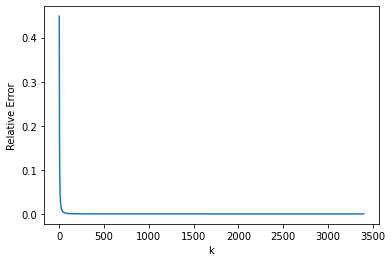

(3397, -0.8201121975100795, 0.000000999414372538626497029919960902)


In [ ]:
def series_2(x): #this function is almost the same as above but subtracts f(1) from f(x)
  err = []
  terms = []
  mp.dps = 30; mp.pretty = True
  true_value = nsum(lambda n: 1/(n**2+x*n) - 1/(n**2 + n), [1, inf])
  i = 1
  sum = 0
  error = 1
  while error >= 1e-6:
    term = (1.0/(i * (i + x)) - 1.0/(i * (i + 1)))
    sum += term
    error = (true_value - sum) / true_value
    err.append(error)
    terms.append(i)
    if error >= 1e-6:
      i += 1
    else: break
  plt.plot(terms, err)
  plt.ylabel('Relative Error')
  plt.xlabel('k')
  plt.show()
  return i, sum, error

print(series_2(0))
print(series_2(0.9))
print(series_2(20))

**Conclusion**

The experiment revealed that to gain a result as accurate as possible, we need to use as many terms as we can. In that case the error will be very small. For example, we need hundreds of thousands or even millions of terms for the first series. However, in the third part, we subtract a significant amount, which is why less terms are needed.